<a href="https://colab.research.google.com/github/giakomorssi/DataViz/blob/main/02_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Clean the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/University/DataViz/tweet.xlsx')

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['verified'] = le.fit_transform(df['verified'])

# Static Visualizations

In [8]:
!pip install -q chart_studio

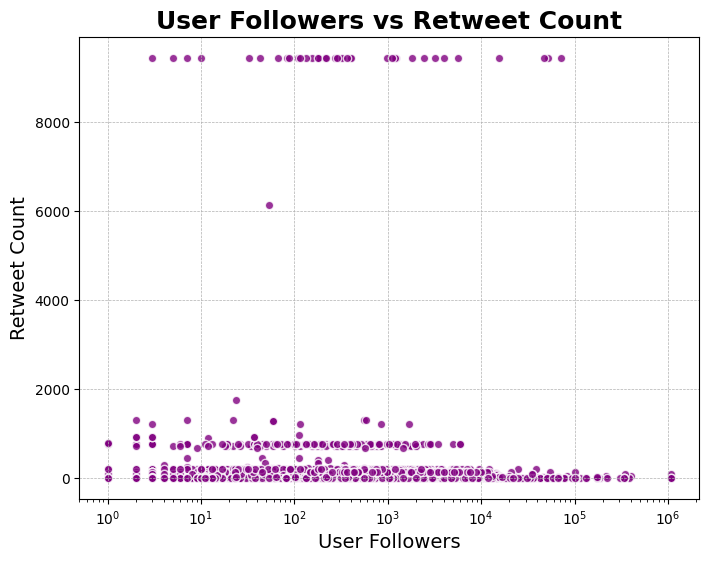

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the figure size
plt.figure(figsize=(8,6))

# Create a scatter plot of user followers vs retweet count
plt.scatter(df['user_followers'], df['retweet_count'], alpha=0.8, color='purple', edgecolors='white')

# Set the title and axis labels
plt.title('User Followers vs Retweet Count', fontsize=18, fontweight='bold')
plt.xlabel('User Followers', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)

# Set the x-axis to use a logarithmic scale for better visualization
plt.xscale('log')

# Add grid lines
plt.grid(linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

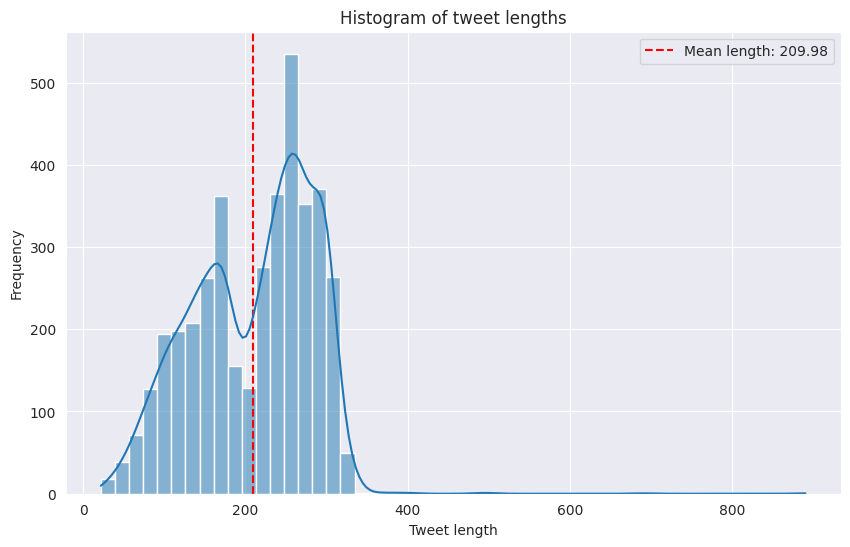

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/University/DataViz/tweet.xlsx')

tweet_lengths = df['tweet_text'].str.len()

sns.set_style("darkgrid")

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create histogram in the background
mean_length = sum(tweet_lengths) / len(tweet_lengths)
ax.axvline(mean_length, color='red', linestyle='--', label=f'Mean length: {mean_length:.2f}')

# create main histogram
sns.histplot(data=df, x=tweet_lengths, bins=50, kde=True, ax=ax)

# set labels and title
ax.set_xlabel('Tweet length')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of tweet lengths')

# add legend
ax.legend()

# show plot
plt.show()

# Dynamic Visualizations

In [16]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

df = pd.read_excel('/content/drive/MyDrive/University/DataViz/tweet.xlsx')

# Get the top ten tweet sources
top_tweet_sources = df['tweet_source'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only the top ten tweet sources
df_top_tweet_sources = df[df['tweet_source'].isin(top_tweet_sources)]

# Create the horizontal stacked bar chart
fig = px.bar(df_top_tweet_sources, y='query', color='tweet_source', barmode='stack', title='Tweet Sources by Query')

# Set the axis labels
fig.update_layout(xaxis_title='Count', yaxis_title='Query')

# Save the plot to Plotly
chart_studio.tools.set_credentials_file(username='giakomorossi', api_key='jQYmViiVXtTECQ3ZwyC1')
py.plot(fig, filename='Tweet Sources by Query', auto_open=True)

# Show the plot
fig.show()

In [17]:
import re
import pandas as pd
import plotly.express as px
import chart_studio 
import chart_studio.plotly as py

df = pd.read_excel('/content/drive/MyDrive/University/DataViz/tweet.xlsx')

# Prompt the user to enter the search term
search_term = 'data'
# input('Enter the search term: ')

# Define the regular expression pattern for categories
pattern = r'\b{}\w+'.format(search_term)

#pattern = r'#\w+'

# Define a function to extract the categories from the tweet text
def extract_categories(text):
    return re.findall(pattern, text)

# Extract the categories for each tweet and count their frequency
data = pd.DataFrame(df)
data['categories'] = data['tweet_text'].apply(extract_categories)
category_counts = data['categories'].apply(pd.Series).stack().value_counts()

# Keep only the top 10 categories
category_counts = category_counts.head(10)

# Convert the data to a dataframe for plotting in Plotly
df = pd.DataFrame({'Categories': category_counts.index, 'Frequency': category_counts.values})

# Add percentage to the hover information
df['Percentage'] = round(df['Frequency'] / df['Frequency'].sum() * 100, 2)
hover_template = 'Category: %{label}<br>Frequency: %{value}<br>Percentage: %{customdata}'

# Create a treemap using Plotly
fig = px.treemap(df, path=['Categories'], values='Frequency', title='Category Distribution in Tweet Text', hover_data=['Percentage'])
fig.update_traces(hovertemplate=hover_template)

# Save the plot to Plotly
chart_studio.tools.set_credentials_file(username='giakomorossi', api_key='jQYmViiVXtTECQ3ZwyC1')
py.plot(fig, filename='Category Distribution in Tweet Text', auto_open=True)

# Show the chart
fig.show()

<ipython-input-17-8e35f8065abe>:25: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

